In [144]:
import sqlite3 as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [145]:
con = sq.connect("model_results2050.db")
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

In [146]:
tables

[('var_g',),
 ('var_installed_cap',),
 ('var_storage_level',),
 ('var_installed_storage',),
 ('var_charge',),
 ('var_discharge',),
 ('var_emissions',),
 ('scalarvariables',)]

In [148]:
con2020 = sq.connect("model_results2020.db")
con2025 = sq.connect("model_results2025.db")
con2030 = sq.connect("model_results2030.db")
con2035 = sq.connect("model_results2035.db")
con2040 = sq.connect("model_results2040.db")
con2045 = sq.connect("model_results2045.db")
con2050 = sq.connect("model_results2050.db")

df2020 = pd.read_sql_query("SELECT * FROM var_installed_cap", con2020)
df2025 = pd.read_sql_query("SELECT * FROM var_installed_cap", con2025)
df2030 = pd.read_sql_query("SELECT * FROM var_installed_cap", con2030)
df2035 = pd.read_sql_query("SELECT * FROM var_installed_cap", con2035)
df2040 = pd.read_sql_query("SELECT * FROM var_installed_cap", con2040)
df2045 = pd.read_sql_query("SELECT * FROM var_installed_cap", con2045)
df2050 = pd.read_sql_query("SELECT * FROM var_installed_cap", con2050)

df_storage2020 = pd.read_sql_query("SELECT * FROM var_installed_storage", con2020)
df_storage2025 = pd.read_sql_query("SELECT * FROM var_installed_storage", con2025)
df_storage2030 = pd.read_sql_query("SELECT * FROM var_installed_storage", con2030)
df_storage2035 = pd.read_sql_query("SELECT * FROM var_installed_storage", con2035)
df_storage2040 = pd.read_sql_query("SELECT * FROM var_installed_storage", con2040)
df_storage2045 = pd.read_sql_query("SELECT * FROM var_installed_storage", con2045)
df_storage2050 = pd.read_sql_query("SELECT * FROM var_installed_storage", con2050)

cost2020 = int(pd.read_sql_query("SELECT * FROM scalarvariables", con2020)["level"])
cost2025 = int(pd.read_sql_query("SELECT * FROM scalarvariables", con2025)["level"])
cost2030 = int(pd.read_sql_query("SELECT * FROM scalarvariables", con2030)["level"])
cost2035 = int(pd.read_sql_query("SELECT * FROM scalarvariables", con2035)["level"])
cost2040 = int(pd.read_sql_query("SELECT * FROM scalarvariables", con2040)["level"])
cost2045 = int(pd.read_sql_query("SELECT * FROM scalarvariables", con2045)["level"])
cost2050 = int(pd.read_sql_query("SELECT * FROM scalarvariables", con2050)["level"])

tot_sys_costs = [cost2020,cost2025,cost2030,cost2035,cost2040,cost2045,cost2050]

display(df2020)
display(df_storage2020)
print(tot_sys_costs)

,t,level,lo,up,marginal
0,wind,27806.173713,0.0,1.000000e+100,0.0
1,pv,29380.816186,0.0,1.000000e+100,0.0
2,gas,16002.370403,0.0,1.000000e+100,0.0
3,gas_ccs,13264.519829,0.0,1.000000e+100,0.0


,s,level,lo,up,marginal
0,battery,1279.454954,0.0,1.000000e+100,0.0


[11552292649, 11355598995, 11136364896, 10890440512, 10615210441, 10313957710, 9973992411]


In [149]:
df_installed_generation = pd.DataFrame([["2020", df2020["level"][0], df2020["level"][1], df2020["level"][2], df2020["level"][3]],\
                  ["2025", df2025["level"][0], df2025["level"][1], df2025["level"][2], df2025["level"][3]],\
                  ["2030", df2030["level"][0], df2030["level"][1], df2030["level"][2], df2030["level"][3]],\
                  ["2035", df2035["level"][0], df2035["level"][1], df2035["level"][2], df2035["level"][3]],\
                  ["2040", df2040["level"][0], df2040["level"][1], df2040["level"][2], df2040["level"][3]],\
                  ["2045", df2045["level"][0], df2045["level"][1], df2045["level"][2], df2045["level"][3]],\
                  ["2050", df2050["level"][0], df2050["level"][1], df2050["level"][2], df2050["level"][3]]],\
                 columns=["year", "wind", "pv", "gas", "gas_ccs"])
display(df_installed_generation)

df_installed_storage = pd.DataFrame([["2020", df_storage2020["level"][0]],\
                                    ["2025", df_storage2025["level"][0]],\
                                    ["2030", df_storage2030["level"][0]],\
                                    ["2035", df_storage2035["level"][0]],\
                                    ["2040", df_storage2040["level"][0]],\
                                    ["2045", df_storage2045["level"][0]],\
                                    ["2050", df_storage2050["level"][0]]], columns=["year", "battery"])
display(df_installed_storage)

,year,wind,pv,gas,gas_ccs
0,2020,27806.173713,29380.816186,16002.370403,13264.519829
1,2025,26971.121301,32403.153761,14686.066793,14516.582662
2,2030,26747.403301,37413.645610,12522.404376,15250.657919
3,2035,26968.363338,42687.964245,10915.573706,15562.293273
4,2040,26351.325576,47704.634156,9852.482008,15704.865527
5,2045,25879.185198,54327.086268,8468.259016,15500.537094
6,2050,25550.216310,59415.924266,7857.534005,15803.559862


,year,battery
0,2020,1279.454954
1,2025,1498.916440
2,2030,7926.443854
3,2035,14873.201388
4,2040,20988.976248
5,2045,33439.542372
6,2050,36269.743200


Text(0, 0.5, 'MWh')

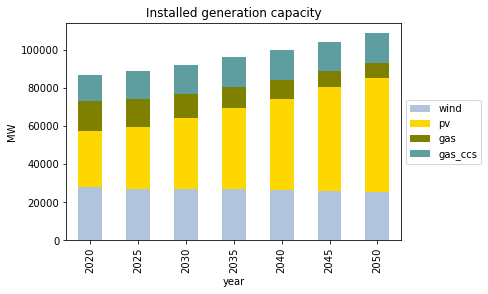

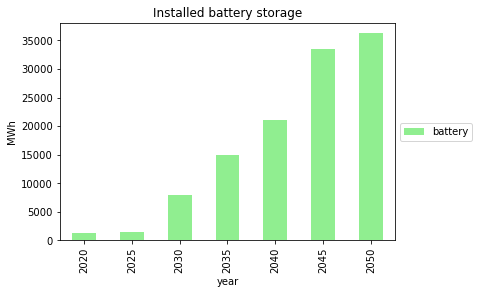

In [159]:

df_installed_generation.plot(x='year', kind="bar", stacked=True, color=["lightsteelblue", "gold", "olive", "cadetblue"],
        title='Installed generation capacity').legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.ylabel("MW")
df_installed_storage.plot(x="year", kind="bar", color="lightgreen", \
                          title="Installed battery storage").legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.ylabel("MWh")

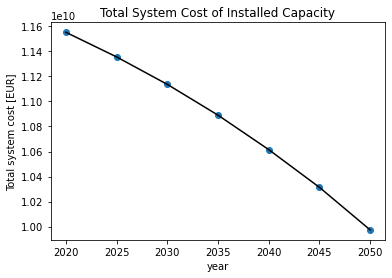

In [151]:
years = ["2020", "2025", "2030", "2035", "2040", "2045", "2050"]
plt.plot(years, tot_sys_costs, color="black")
plt.scatter(years, tot_sys_costs)
plt.xlabel("year")
plt.ylabel("Total system cost [EUR]")
plt.title("Total System Cost of Installed Capacity")
plt.show()

<AxesSubplot:>

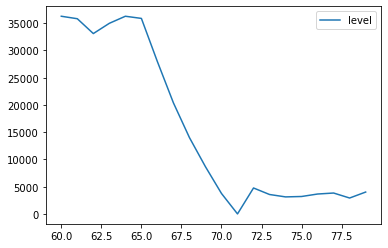

In [165]:
df_storage_ramp = pd.read_sql_query("SELECT * FROM var_storage_level", con2050)
df_storage_ramp[60:80].plot(y="level")